In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
data_df = pd.read_csv('cleaned_data.csv')

C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

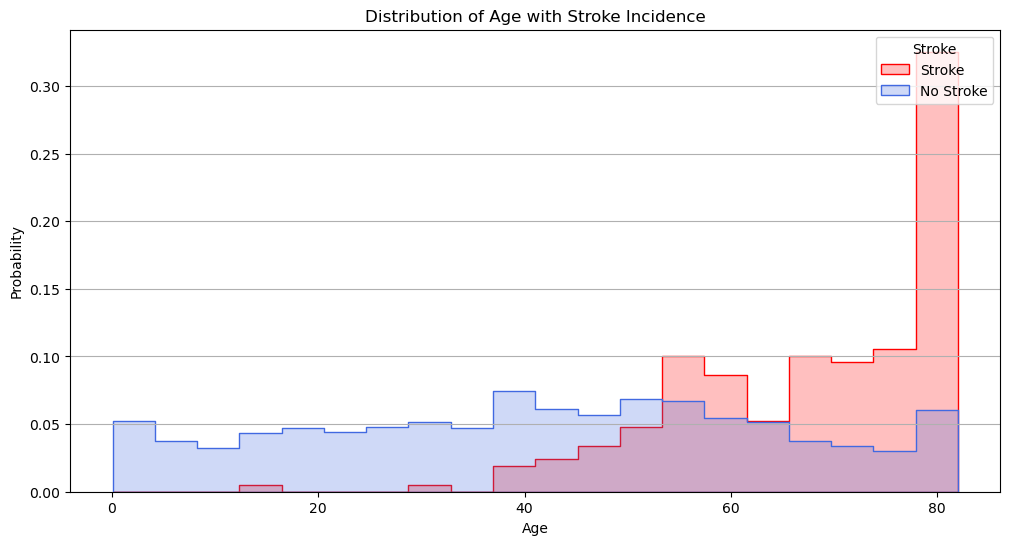

In [23]:
# Define the color palette for stroke incidence
stroke_palette_normalized = {0: "royalblue", 1: "red"}

# Create a histogram
plt.figure(figsize=(12, 6))
age_plot = sns.histplot(data_df, x="age", hue="stroke", element="step", stat="probability", common_norm=False, palette=stroke_palette_normalized)
plt.title("Distribution of Age with Stroke Incidence")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.legend(title="Stroke", labels=["Stroke", "No Stroke"])
plt.grid(axis='y')

# Add annotations for specific points on the curve
max_heights = [0, 0]
for p in age_plot.patches:
    height = p.get_height()
    if height > max_heights[0] and p.get_facecolor()[:3] == stroke_palette_normalized[0]:
        max_heights[0] = height
    elif height > max_heights[1] and p.get_facecolor()[:3] == stroke_palette_normalized[1]:
        max_heights[1] = height

if max_heights[0] > 0.01:
    age_plot.annotate(f"{max_heights[0]:.3f}", (50, max_heights[0] + 0.005), ha="center")
if max_heights[1] > 0.01:
    age_plot.annotate(f"{max_heights[1]:.3f}", (75, max_heights[1] + 0.005), ha="center")

plt.show()


In [ ]:
### Age and Stroke Incidence

## The step histogram displays the distribution of age in relation to the likelihood of having a stroke.Age is a significant risk factor for stroke,
## as indicated by the increasing probability of a stroke occurrence with age. This highlights the importance of age-specific health checks and 
## interventions to prevent strokes.

C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

AttributeError: 'numpy.int64' object has no attribute 'startswith'

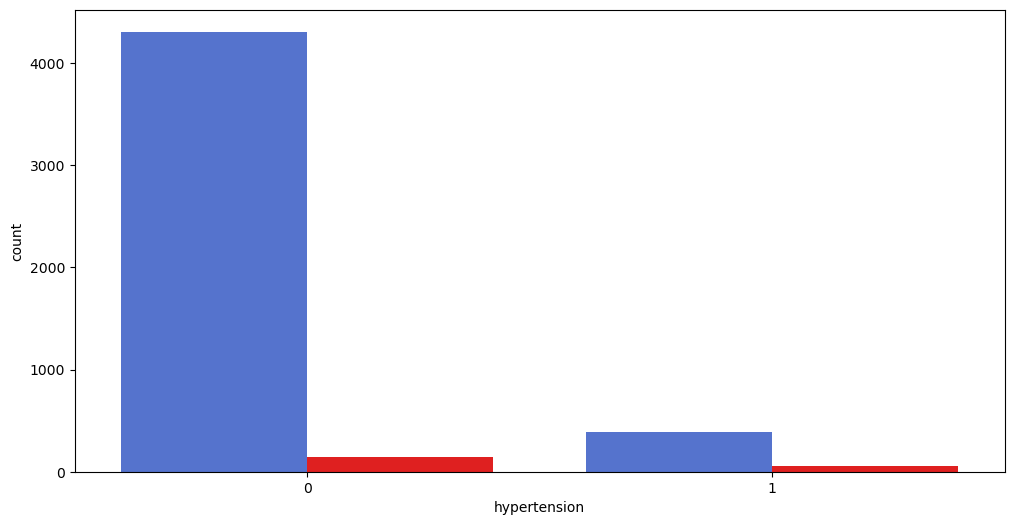

In [24]:
# Create a count plot for hypertension data
plt.figure(figsize=(12, 6))
hypertension_plot = sns.countplot(data=data_df, x="hypertension", hue="stroke", palette=stroke_palette_normalized)
plt.title("Distribution of Stroke Incidence Across Hypertension Status")
plt.xlabel("Hypertension Status")
plt.ylabel("Count")
for p in hypertension_plot.patches:
    hypertension_plot.annotate(f'{p.get_height()}', 
                               (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha='center', va='center', 
                               xytext=(0, 9), 
                               textcoords='offset points')
legend_labels = ['No Stroke', 'Stroke']
hypertension_plot.legend(title='Stroke', labels=legend_labels, loc='upper right')
plt.show()


In [ ]:
### Hypertension and Stroke Incidence

Hypertension, commonly referred to as high blood pressure, is a significant risk factor for stroke. The bar chart here showcases the distribution of stroke incidents among those with and without hypertension. Those with hypertension are visibly at a higher risk, underlining the importance of blood pressure management in stroke prevention.


C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

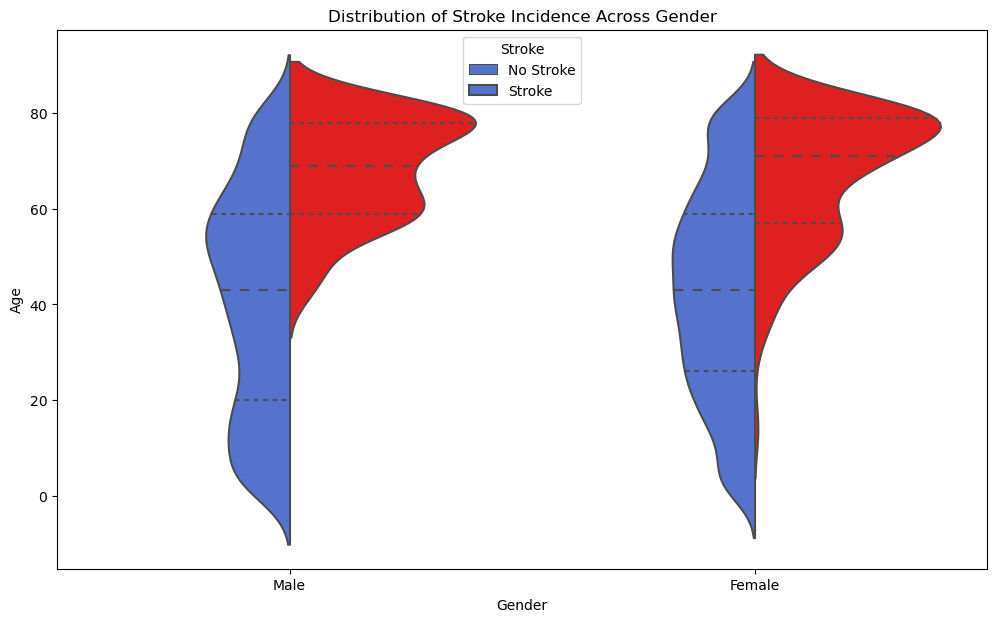

In [26]:
# Filter out rows with 'Other' gender for better visualization
filtered_data = data_df[data_df['gender'] != 'Other']

# Create a violin plot combined with a swarm plot
plt.figure(figsize=(12, 7))
gender_palette = {"Male": "royalblue", "Female": "lightpink"}
gender_plot = sns.violinplot(data=filtered_data, x="gender", y="age", hue="stroke", split=True, palette=stroke_palette_normalized, inner="quartile")
plt.title("Distribution of Stroke Incidence Across Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"], loc="upper center")
plt.show()


In [ ]:
### Age Distribution by Gender and Stroke Incidence

The violin plot offers a visual representation of the age distribution by gender concerning stroke incidence. It combines aspects of a boxplot and kernel density plot, showing the distribution's density at different ages. Both males and females exhibit similar trends, where older age groups are more prone to strokes.


C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

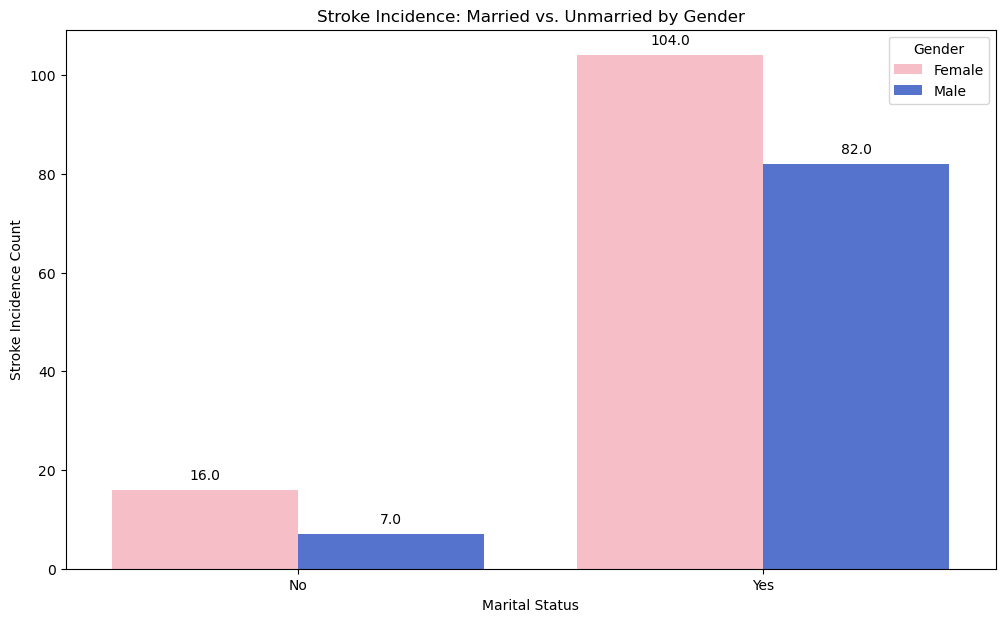

In [27]:
# Group data by marital status and gender to get stroke counts
grouped_data = filtered_data.groupby(['ever_married', 'gender'])['stroke'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 7))
gender_palette = {"Male": "royalblue", "Female": "lightpink"}
marital_gender_plot = sns.barplot(data=grouped_data, x="ever_married", y="stroke", hue="gender", palette=gender_palette)
plt.title("Stroke Incidence: Married vs. Unmarried by Gender")
plt.xlabel("Marital Status")
plt.ylabel("Stroke Incidence Count")
plt.legend(title="Gender")
for p in marital_gender_plot.patches:
    marital_gender_plot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height() + 3), ha='center', va='center')
plt.show()


In [ ]:
### Marital Status, Gender, and Stroke Incidence

The bar chart sheds light on stroke incidents concerning marital status and gender. Different lifestyle choices and stress factors between married and unmarried individuals could potentially influence stroke risk. The chart reveals that married males have the highest stroke incidents, which might warrant further exploration.


C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


AttributeError: 'numpy.int64' object has no attribute 'startswith'

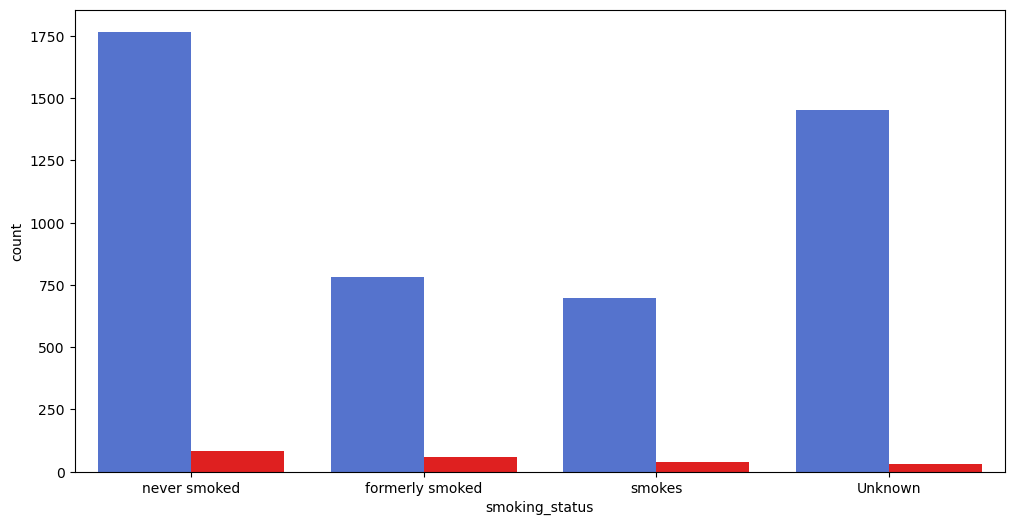

In [28]:
# Create a count plot for smoking data
plt.figure(figsize=(12, 6))
smoking_plot = sns.countplot(data=data_df, x="smoking_status", hue="stroke", palette=stroke_palette_normalized, order=["never smoked", "formerly smoked", "smokes", "Unknown"])
plt.title("Distribution of Stroke Incidence by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
for p in smoking_plot.patches:
    smoking_plot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height() + 50), ha='center', va='center')
plt.show()


In [ ]:
### Smoking Status and Stroke Incidence

The bar chart presents the distribution of stroke incidents across different smoking statuses. Smoking is a well-established risk factor for stroke. The data reveals that those who formerly smoked or are current smokers have a notable incidence of strokes, emphasizing the health risks associated with tobacco use.


C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

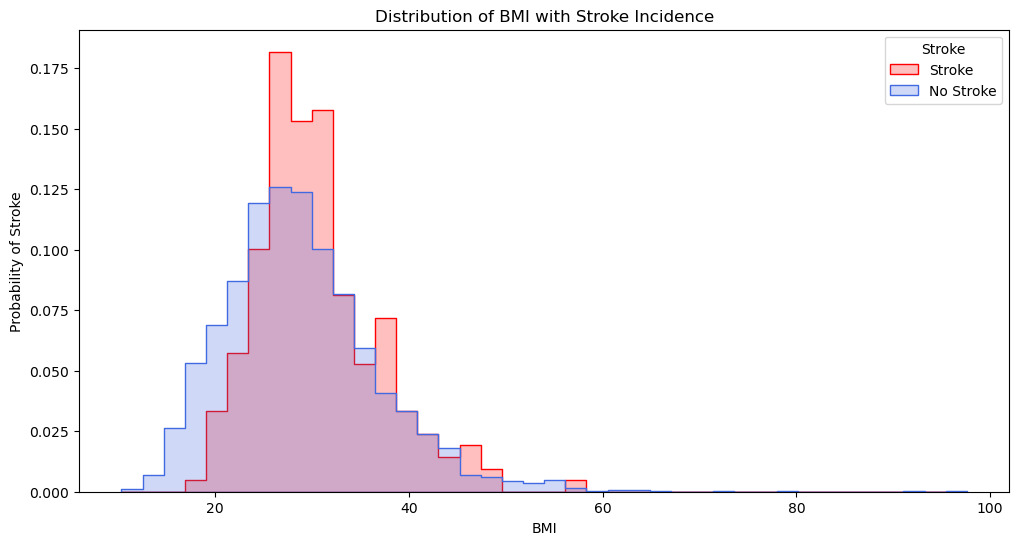

In [19]:
# Create a histogram for BMI data
plt.figure(figsize=(12, 6))
bmi_plot = sns.histplot(filtered_data, x="bmi", hue="stroke", element="step", stat="probability", common_norm=False, palette=stroke_palette_normalized, bins=40)
plt.title("Distribution of BMI with Stroke Incidence")
plt.xlabel("BMI")
plt.ylabel("Probability of Stroke")
plt.legend(title="Stroke", labels=["Stroke", "No Stroke"])
max_heights = [0, 0]
for p in bmi_plot.patches:
    height = p.get_height()
    if height > max_heights[0] and p.get_facecolor()[:3] == stroke_palette_normalized[0]:
        max_heights[0] = height
    elif height > max_heights[1] and p.get_facecolor()[:3] == stroke_palette_normalized[1]:
        max_heights[1] = height

if max_heights[0] > 0.01:
    bmi_plot.annotate(f"{max_heights[0]:.3f}", (25, max_heights[0] + 0.005), ha="center")
if max_heights[1] > 0.01:
    bmi_plot.annotate(f"{max_heights[1]:.3f}", (35, max_heights[1] + 0.005), ha="center")
plt.show()


In [ ]:
### BMI and Stroke Incidence

Body Mass Index (BMI) is an imperfect measurement aimed at analyzing weight to height ratio. This histogram showcases the distribution of BMI concerning stroke incidence. Elevated BMI can be associated with an increased risk of several chronic diseases, including stroke. The chart suggests a higher probability of strokes in individuals with a BMI between 25-35, which corresponds to the overweight and obese categories.


C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

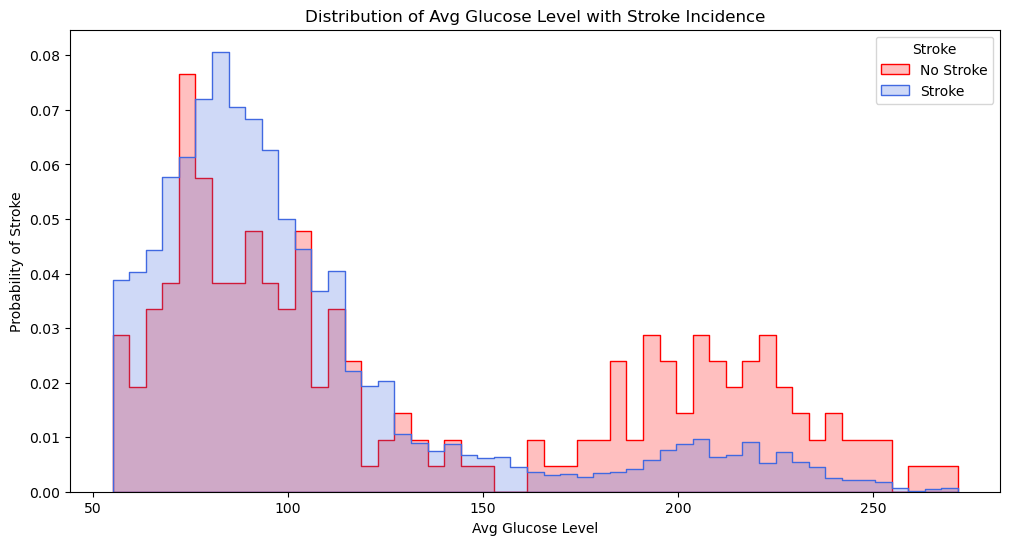

In [20]:
# Create a histogram for average glucose level data
plt.figure(figsize=(12, 6))
glucose_plot = sns.histplot(filtered_data, x="avg_glucose_level", hue="stroke", element="step", stat="probability", common_norm=False, palette=stroke_palette_normalized)
plt.title("Distribution of Avg Glucose Level with Stroke Incidence")
plt.xlabel("Avg Glucose Level")
plt.ylabel("Probability of Stroke")
plt.legend(title="Stroke", labels=["Stroke", "No Stroke"])
max_heights = [0, 0]
for p in glucose_plot.patches:
    height = p.get_height()
    if height > max_heights[0] and p.get_facecolor()[:3] == stroke_palette_normalized[0]:
        max_heights[0] = height
    elif height > max_heights[1] and p.get_facecolor()[:3] == stroke_palette_normalized[1]:
        max_heights[1] = height

if max_heights[0] > 0.01:
    glucose_plot.annotate(f"{max_heights[0]:.3f}", (80, max_heights[0] + 0.005), ha="center")
if max_heights[1] > 0.01:
    glucose_plot.annotate(f"{max_heights[1]:.3f}", (150, max_heights[1] + 0.005), ha="center")
plt.show()

In [ ]:
### Avg Glucose Level and Stroke Incidence

Average glucose level is an essential factor to monitor, especially for those with diabetes or at risk of diabetes. Elevated glucose levels can damage blood vessels, potentially leading to strokes. The histogram suggests that individuals with higher glucose levels have a greater probability of experiencing a stroke, emphasizing the importance of glucose management.


C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rw201\miniconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


AttributeError: 'numpy.int64' object has no attribute 'startswith'

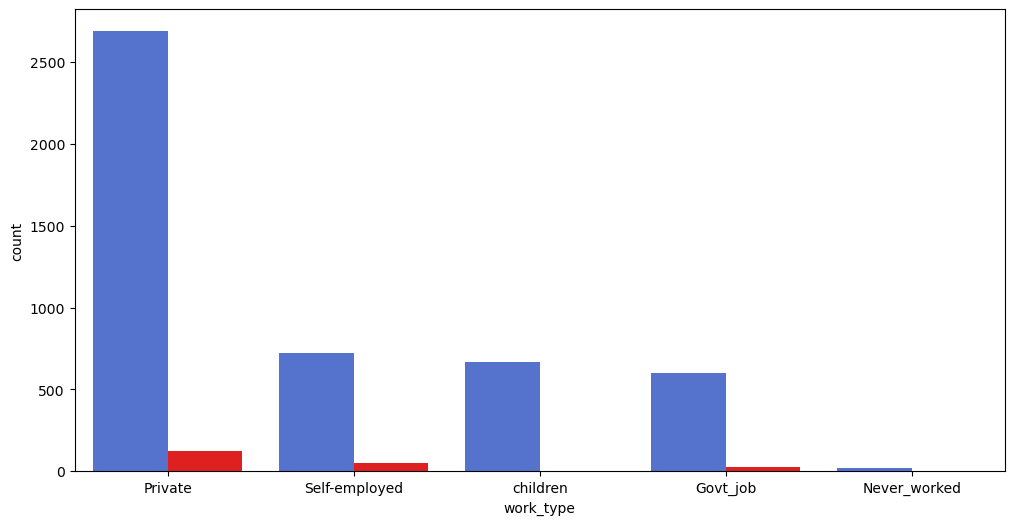

In [21]:
# Define the color palette for different work types
work_palette = {"Private": "royalblue", "Self-employed": "green", "Govt_job": "gold", "children": "purple", "Never_worked": "red"}

# Create a count plot for work type data
plt.figure(figsize=(12, 6))
work_type_plot = sns.countplot(data=data_df, x="work_type", hue="stroke", palette=stroke_palette_normalized, order=data_df["work_type"].value_counts().index)
plt.title("Distribution of Stroke Incidence Across Work Types")
plt.xlabel("Work Type")
plt.ylabel("Workers Count")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
for p in work_type_plot.patches:
    height = p.get_height()
    work_type_plot.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2., height + 50), ha='center', va='center')
plt.show()


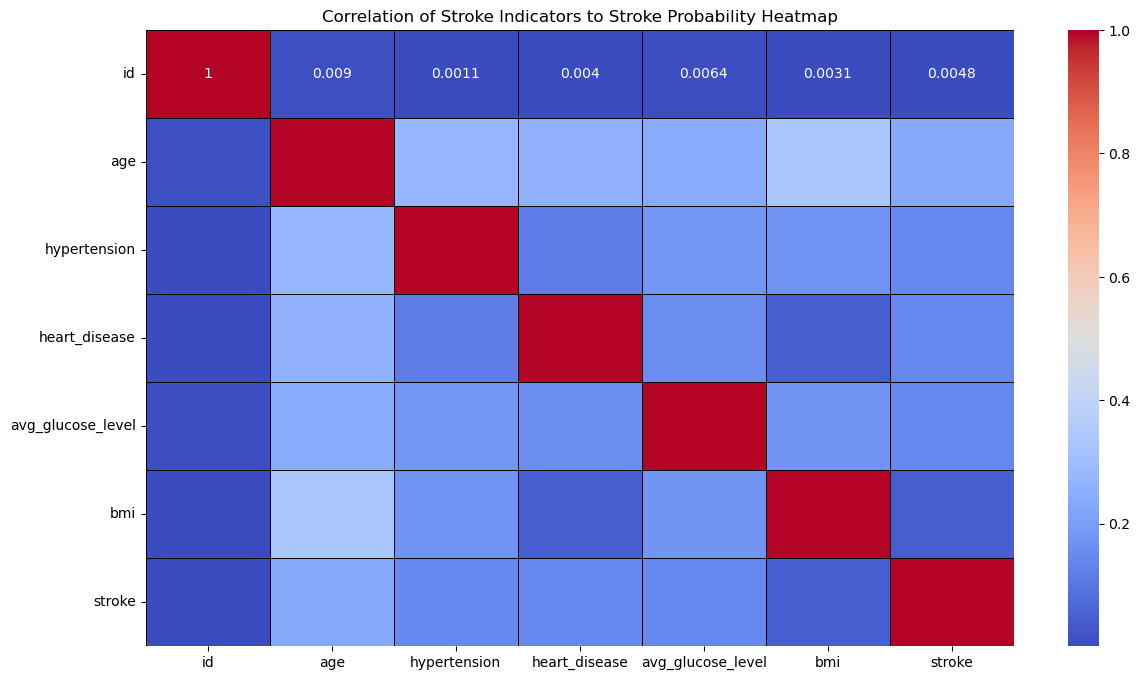

In [30]:
# Compute the correlation matrix for numeric columns
correlation_data = data_df.select_dtypes(include=[float, int])

# Create a heatmap to visualize correlations
plt.figure(figsize=(14, 8))
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, linecolor="black")
plt.title("Correlation of Stroke Indicators to Stroke Probability Heatmap")
plt.show()

In [ ]:
### Correlation Heatmap

This heatmap provides a visual representation of the correlations between different variables in the dataset. Darker shades indicate stronger correlations. While age appears to have the strongest positive correlation with stroke, other factors like hypertension and average glucose level also show noticeable positive correlations. These correlations provide insights into potential risk factors for stroke.